In [1]:
#for pandas
import pandas as pd

In [2]:
#for numpy
import numpy as np

In [3]:
#for plotting purpose
import matplotlib.pyplot as plt

In [4]:
#fr better visualizing purpose
import seaborn as sns

In [5]:
#for transforming degree one or simple features to polynomial features
from sklearn.preprocessing import PolynomialFeatures 

In [6]:
#computing sigmoid function
def gz(theta,x):
    hey=x.dot(theta)
    hey=1+np.exp((-1)*hey)
    hey=1/hey
    return hey

In [7]:
#computing error-cost or log cost for logistic regression
def compute_cost(theta,x,y,lambo=0):
    m=x.shape[0]
    hey=gz(theta,x)
    cost=(1/m)*np.sum(((-y)*(np.log(hey)))-((1-y)*(np.log(1-hey))))
    cost=cost+(lambo/(2*m))*np.sum(theta[1:]**2)
    return cost

In [8]:
#computes gradient at particular point
def compute_grad(theta,x,y,lambo=0):
    hey=gz(theta,x)
    m=x.shape[0]
    grad=(1/m)*(np.transpose(x).dot(hey-y))
    grad[1:]=grad[1:]+(lambo/m)*(theta[1:])
    return grad

In [9]:
#scale self features and return mean and variance
def feature_scale_own(x):
    m=x.shape[0]
    mu=(1/m)*np.sum(x,axis=0)
    sig=np.std(x,axis=0,ddof=1)
    mu[0]=0
    sig[0]=1
    x=(x-mu)/sig
    return x,mu,sig

In [10]:
#scale itself using mean and variance of some other set
def feature_scale_other(x,mu,sig):
    x=(x-mu)/sig
    return x

In [11]:
#master function to replicate modifications made in training set to validation and training set
def all_in_one_conv(data,yom,yof,yoc,yoq,yos,yo1,yo2,farerem=False,testclass=False):
    if testclass==False:
      minus=0
    elif testclass==True:
      minus=1
    #"Sex" column treartment
    data.iloc[(data["Sex"]=="male").ravel(),(4-minus)]=float(yom)
    data.iloc[(data["Sex"]=="female").ravel(),(4-minus)]=float(yof)    
    #"Age" column treatment
    nullind=data["Age"].index[data["Age"].apply(np.isnan)]
    if testclass==False:
      for i in nullind:
          if data.iloc[i,1]==1:
              data.iloc[i,5]=float(yo1)
          else:
              data.iloc[i,5]=float(yo2)
    elif testclass==True:
        for i in nullind:
            data.iloc[i,(5-minus)]=float((yo1+yo2)/2)
            
    #"Embarked" column treatment
    data.iloc[(data["Embarked"]=="C").ravel(),(11-minus)]=float(yoc)
    data.iloc[(data["Embarked"]=="Q").ravel(),(11-minus)]=float(yoq)
    data.iloc[(data["Embarked"]=="S").ravel(),(11-minus)]=float(yos)
    
    #if fare values are missing then we remove them
    if farerem==True:
        ind=data["Fare"].index[data["Fare"].apply(np.isnan)]
        data=data.drop(ind)
        data=data.reset_index(drop=True)
    return data


In [12]:
#output test set predictions
def test_output(theta,x,threshold):
    hey=gz(theta,x)
    hey=(hey>threshold).ravel()
    hey=hey.astype(int)
    return hey

In [13]:
#compute accuracy of classification based on right or wrong prediction numbers
def compute_acc(theta,x,y,ep):
    hey=gz(theta,x)
    m=x.shape[0]
    hey=(hey>ep).reshape(-1,1)
    hey=hey.astype(float)
    c=(hey==y)
    d=(np.sum(c))/m
    return d


In [14]:
#location of training set csv file
dataloc="C:/Users/Ritik/Desktop/Projects_Flash/Titanic_/train.csv"

In [15]:
#loading training set into program
data=pd.read_csv(dataloc,header=0)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
#now we can take random 30% of total set and put it in validation set as test set we are provided with by problem setter himself
#approx 30% of 891 is 270 

In [20]:
random_index=np.arange(0,891,1)
np.random.shuffle(random_index)

In [21]:
#shuffling data
data=data.iloc[(random_index.ravel()),:]

In [22]:
#dividing
dataval=data.iloc[0:270,:]
datatrain=data.iloc[270:891,:]
dataval=dataval.reset_index(drop=True)
datatrain=datatrain.reset_index(drop=True)
print(dataval.shape)
print(datatrain.shape)

(270, 12)
(621, 12)


In [23]:
datatrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
1,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
2,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
3,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
4,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S


In [24]:
datatrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,621.000000,621.000000,621.000000,495.000000,621.000000,621.000000,621.000000
mean,446.962963,0.371981,2.331723,29.276606,0.536232,0.376812,31.375724
std,260.057234,0.483723,0.832471,14.341233,1.111839,0.796996,46.302171
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,452.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.858300
75%,675.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.695800
max,889.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [25]:
dataval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
1,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
2,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
3,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
4,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S


In [26]:
#now doing refining or correcting process

In [27]:
#clearly many of the values are missing from the Age column

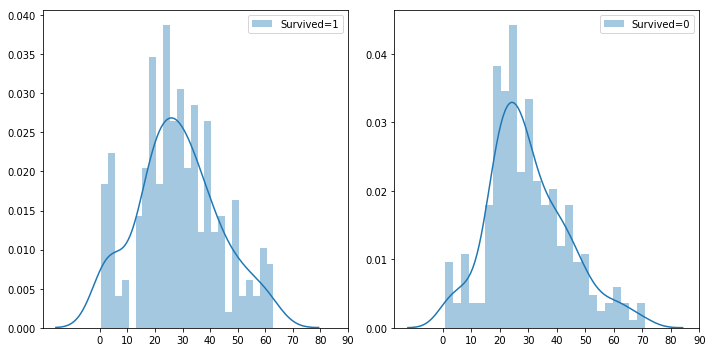

In [28]:
on=((datatrain["Survived"]==1)&(datatrain["Age"].notnull())).ravel()
off=((datatrain["Survived"]==0)&(datatrain["Age"].notnull())).ravel()
hey=np.array(datatrain.iloc[on,5])
heyo=np.array(datatrain.iloc[off,5])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1=sns.distplot(hey,bins=25)
plt.xticks(np.arange(0,100,10))
plt.legend(["Survived=1"])
plt.subplot(1,2,2)
ax2=sns.distplot(heyo,bins=25)
plt.xticks(np.arange(0,100,10))
plt.legend(["Survived=0"])
plt.tight_layout()

In [29]:
x1,y1=ax1.lines[0].get_data()
x2,y2=ax2.lines[0].get_data()
yo1=x1[np.argmax(y1)]
yo2=x2[np.argmax(y2)]
print(yo1,yo2)

26.07848123540728 24.239574480301602


In [30]:
#WHAT I DID
#SAY FOR EXAMPLE
#so in survive maximum number of people survived who had age 30 approx
#and people who didnt survive in them the most common age was around 28

#so we will replace missing blocks in age column with 33 if survive ==1
# and 28 if survive==0

In [31]:
#first identify indexes with null values
nullind=datatrain["Age"].index[datatrain["Age"].apply(np.isnan)]
print(nullind)

Int64Index([  2,   3,   8,  19,  25,  26,  32,  40,  43,  49,
            ...
            562, 563, 571, 578, 583, 584, 585, 596, 605, 610],
           dtype='int64', length=126)


In [32]:
for i in nullind:
    if datatrain.iloc[i,1]==1:
      datatrain.iloc[i,5]=float(yo1)
    else:
      datatrain.iloc[i,5]=float(yo2)

In [33]:
datatrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,446.962963,0.371981,2.331723,28.254600,0.536232,0.376812,31.375724
std,260.057234,0.483723,0.832471,12.960838,1.111839,0.796996,46.302171
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,452.000000,0.000000,3.000000,24.239574,0.000000,0.000000,13.858300
75%,675.000000,1.000000,3.000000,35.000000,1.000000,0.000000,30.695800
max,889.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [34]:
#now we have dealt with age column
#now its time to look gender("Sex") column

In [35]:
#first checking for null values in "sex" column
datatrain["Sex"].isnull().any()

False

In [36]:
#so no null values in this column

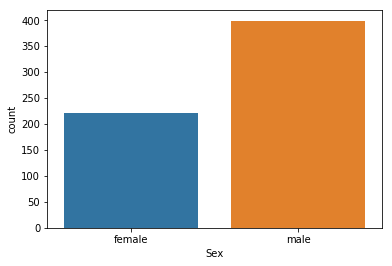

In [37]:
sns.countplot(datatrain["Sex"])

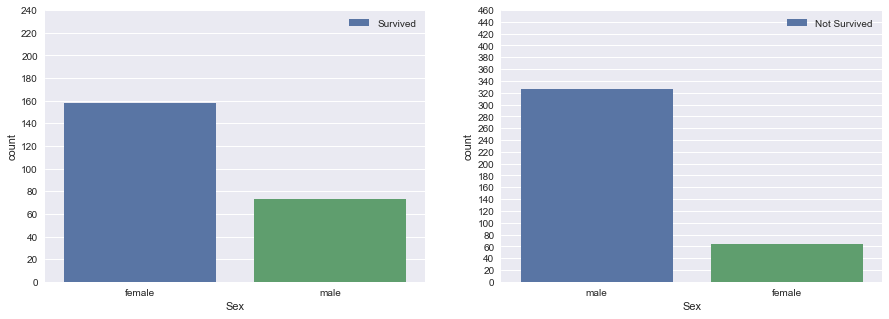

In [38]:
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(datatrain.iloc[(datatrain["Survived"]==1).ravel(),4])
plt.yticks(np.arange(0,250,20))
plt.legend(["Survived"])
plt.subplot(1,2,2)
sns.countplot(datatrain.iloc[(datatrain["Survived"]==0).ravel(),4])
plt.yticks(np.arange(0,470,20))
plt.legend(["Not Survived"])

In [39]:
surv=datatrain.iloc[(datatrain["Survived"]==1).ravel(),4]
dead=datatrain.iloc[(datatrain["Survived"]==0).ravel(),4]
heys=surv.value_counts()
heyd=dead.value_counts()
males=heys["male"]
females=heys["female"]
maled=heyd["male"]
femaled=heyd["female"]
yom=males/(males+maled)
yof=females/(females+femaled)
print(yom,yof)

0.18295739348370926 0.7117117117117117


WHAT I DID
SAY FOR EXAMPLE

All in approx
- total female survived=230
- total male survived=110
- total female dead=80
- total male dead=470

male fraction survival=110/(110+470)=0.190 ~ 20%

female fraction survival=230/(230+80)=0.742 ~ 75%

so females have more chance of surviving almost 4 times that as of males

so lets replace females with 0.75 and males with 0.2

In [40]:
datatrain.iloc[(datatrain["Sex"]=="male").ravel(),4]=float(yom)
datatrain.iloc[(datatrain["Sex"]=="female").ravel(),4]=float(yof)

In [41]:
datatrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
datatrain["Sex"].describe()

count     621.000000
unique      2.000000
top         0.182957
freq      399.000000
Name: Sex, dtype: float64

In [43]:
#now knowing more about embarked i.e. the last column

In [44]:
#checking for null values
check=datatrain["Embarked"].isnull().sum()
print(check)
if check!=0:
    miss=pd.isna(datatrain["Embarked"])
    hiss=[]
    for i in range(0,len(miss)):
        if miss[i]==True:
            hiss.append(i)
    print(hiss)
    datatrain.drop(hiss,inplace=True)
    datatrain=datatrain.reset_index(drop=True)

2
[483, 501]


In [45]:
datatrain["Embarked"].describe()

count     619
unique      3
top         S
freq      449
Name: Embarked, dtype: object

In [46]:
datatrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,446.966074,0.369952,2.336026,28.184340,0.537964,0.378029,31.218618
std,259.560059,0.483182,0.830357,12.904483,1.113217,0.797996,46.294200
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,452.000000,0.000000,3.000000,24.239574,0.000000,0.000000,13.791700
75%,673.000000,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,889.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


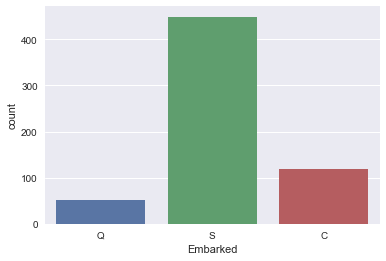

In [47]:
sns.countplot(datatrain["Embarked"])

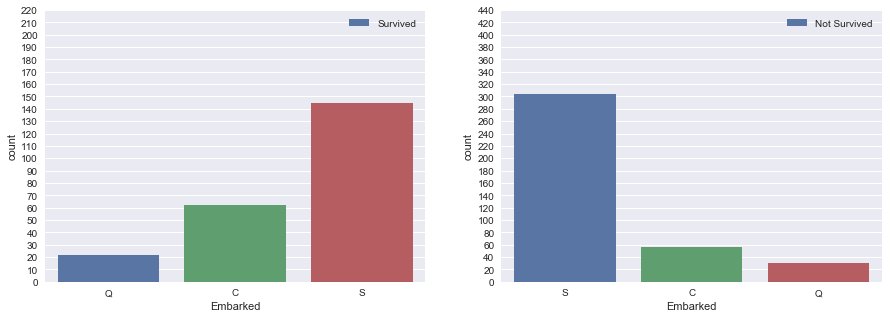

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(datatrain.iloc[(datatrain["Survived"]==1).ravel(),11])
plt.yticks(np.arange(0,230,10))
plt.legend(["Survived"])
plt.subplot(1,2,2)
sns.countplot(datatrain.iloc[(datatrain["Survived"]==0).ravel(),11])
plt.yticks(np.arange(0,450,20))
plt.legend(["Not Survived"])

In [49]:
surv=datatrain.iloc[(datatrain["Survived"]==1).ravel(),11]
heys=surv.value_counts()
dead=datatrain.iloc[(datatrain["Survived"]==0).ravel(),11]
heyd=dead.value_counts()
ss=heys["S"]
cs=heys["C"]
qs=heys["Q"]
sd=heyd["S"]
cd=heyd["C"]
qd=heyd["Q"]
yos=ss/(ss+sd)
yoc=cs/(cs+cd)
yoq=qs/(qs+qd)
print(yos,yoc,yoq)

0.32293986636971045 0.5254237288135594 0.4230769230769231


WHAT I M DOING
(EXAMPLE)

All in approx

- total Cherbourg ppl survived=92
- total Queenstown ppl survived=30
- total Southampton ppl survived=218
- total Cherbourg ppl dead=75
- total Queenstown ppl dead=45
- total Southampton ppl dead=425

fraction of Cherbourg ppl survived = 92/(75+92) = 0.561

fraction of Queenstown ppl survived = 30/(45+30) = 0.400

fraction of Southampton ppl survived = 218/(425+218) = 0.339 

So lets replace C with 0.561
                Q with 0.400
                S with 0.339

In [50]:
datatrain.iloc[(datatrain["Embarked"]=="C").ravel(),11]=float(yoc)
datatrain.iloc[(datatrain["Embarked"]=="Q").ravel(),11]=float(yoq)
datatrain.iloc[(datatrain["Embarked"]=="S").ravel(),11]=float(yos)

### now changing columns which have type OBJECT to float or int

In [51]:
datatrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
#we want to change sex and embarked to float and other integertypes also to float

In [53]:
datatrain["Sex"]=pd.to_numeric(datatrain["Sex"])
datatrain["Embarked"]=pd.to_numeric(datatrain["Embarked"])
datatrain["Survived"]=(pd.to_numeric(datatrain["Survived"])).astype(float)
datatrain["Pclass"]=(pd.to_numeric(datatrain["Pclass"])).astype(float)
datatrain["SibSp"]=(pd.to_numeric(datatrain["SibSp"])).astype(float)
datatrain["Parch"]=(pd.to_numeric(datatrain["Parch"])).astype(float)
datatrain.dtypes

PassengerId      int64
Survived       float64
Pclass         float64
Name            object
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [54]:
# now lets exract input and output from datatrain

In [55]:
listy=[2,4,5,6,7,9,11]
xtrain=np.array(datatrain.iloc[:,listy])
ytrain=np.array(datatrain.iloc[:,1]).reshape(-1,1)

In [56]:
print(xtrain.shape)
print(ytrain.shape)

(619, 7)
(619, 1)


### Now we will prepare training, validation and testing set in proper numpy array format with treatment done to "nan" values 

In [57]:
#adding column of ones to xtrain
xtrain=np.hstack((np.ones(xtrain.shape[0]).reshape(-1,1),xtrain))
print(xtrain.shape)

(619, 8)


In [58]:
#dealing with dataval

In [59]:
dataval.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,270.000000,270.000000,270.000000,219.000000,270.000000,270.000000,270.000000
mean,443.785185,0.411111,2.255556,30.654110,0.492593,0.392593,34.109722
std,251.488029,0.492949,0.843445,14.925977,1.082962,0.827917,56.777782
min,2.000000,0.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,240.500000,0.000000,1.000000,21.000000,0.000000,0.000000,7.956250
50%,433.500000,0.000000,3.000000,29.000000,0.000000,0.000000,15.072900
75%,661.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
dataval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
1,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
2,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
3,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
4,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S


In [61]:
#checking for null in dataval Sex and Embarked
print(dataval["Sex"].isnull().any())
check=dataval["Embarked"].isnull().sum()
print(check)
if check!=0:
    miss=pd.isna(dataval["Embarked"])
    hiss=[]
    for i in range(0,len(miss)):
        if miss[i]==True:
            hiss.append(i)
    print(hiss)
    dataval.drop(hiss,inplace=True)
    dataval=dataval.reset_index(drop=True)


False
0


In [62]:
dataval=all_in_one_conv(dataval,yom,yof,yoc,yoq,yos,yo1,yo2)

In [63]:
dataval.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### now changing columns which have type OBJECT to float or int
(like we did with datatrain)

In [64]:
dataval["Sex"]=pd.to_numeric(dataval["Sex"])
dataval["Embarked"]=pd.to_numeric(dataval["Embarked"])
dataval["Survived"]=(pd.to_numeric(dataval["Survived"])).astype(float)
dataval["Pclass"]=(pd.to_numeric(dataval["Pclass"])).astype(float)
dataval["SibSp"]=(pd.to_numeric(dataval["SibSp"])).astype(float)
dataval["Parch"]=(pd.to_numeric(dataval["Parch"])).astype(float)
dataval.dtypes

PassengerId      int64
Survived       float64
Pclass         float64
Name            object
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [65]:
dataval.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,443.785185,0.411111,2.255556,0.363126,29.558258,0.492593,0.392593,34.109722,0.369709
std,251.488029,0.492949,0.843445,0.251073,13.633238,1.082962,0.827917,56.777782,0.079732
min,2.000000,0.000000,1.000000,0.182957,0.830000,0.000000,0.000000,0.000000,0.322940
25%,240.500000,0.000000,1.000000,0.182957,22.000000,0.000000,0.000000,7.956250,0.322940
50%,433.500000,0.000000,3.000000,0.182957,26.078481,0.000000,0.000000,15.072900,0.322940
75%,661.000000,1.000000,3.000000,0.711712,36.000000,1.000000,0.000000,31.275000,0.423077
max,891.000000,1.000000,3.000000,0.711712,80.000000,8.000000,6.000000,512.329200,0.525424


In [66]:
#now extracting validation input and output examples from dataval 

In [67]:
listy=[2,4,5,6,7,9,11]
xval=np.array(dataval.iloc[:,listy])
yval=np.array(dataval.iloc[:,1]).reshape(-1,1)
print(xval.shape)
print(yval.shape)

(270, 7)
(270, 1)


In [68]:
#addind column of ones to xval
xval=np.hstack((np.ones(xval.shape[0]).reshape(-1,1),xval))
print(xval.shape)

(270, 8)


In [69]:
#now dealing with datatest

In [70]:
dataloc="C:/Users/Ritik/Desktop/Projects_Flash/Titanic_/test.csv"

In [71]:
datatest=pd.read_csv(dataloc,header=0)

In [72]:
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
datatest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [74]:
#checking for missing values in datatest in Sex and Embarked columns
print(datatest["Sex"].isnull().any())
print(datatest["Embarked"].isnull().any())

False
False


### now changing columns which have type OBJECT to float or int
(like we did with datatrain)

In [75]:
datatest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
datatest=all_in_one_conv(datatest,yom,yof,yoc,yoq,yos,yo1,yo2,True,True)

In [77]:
datatest["Sex"]=pd.to_numeric(datatest["Sex"])
datatest["Embarked"]=pd.to_numeric(datatest["Embarked"])
datatest["Pclass"]=(pd.to_numeric(datatest["Pclass"])).astype(float)
datatest["SibSp"]=(pd.to_numeric(datatest["SibSp"])).astype(float)
datatest["Parch"]=(pd.to_numeric(datatest["Parch"])).astype(float)
datatest.dtypes

PassengerId      int64
Pclass         float64
Name            object
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [78]:
#now extracting testing input examples from datatest 

In [79]:
listy=[1,3,4,5,6,8,10]
xtest=np.array(datatest.iloc[:,listy])
print(xtest.shape)

(417, 7)


In [80]:
#adding column of ones
xtest=np.hstack((np.ones(xtest.shape[0]).reshape(-1,1),xtest))
print(xtest.shape)

(417, 8)


In [81]:
datatest.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,0.375693,29.145507,0.448441,0.393285,35.627188,0.383515
std,120.923774,0.842077,0.254791,12.726002,0.897568,0.982419,55.907576,0.086507
min,892.000000,1.000000,0.182957,0.170000,0.000000,0.000000,0.000000,0.322940
25%,996.000000,1.000000,0.182957,23.000000,0.000000,0.000000,7.895800,0.322940
50%,1101.000000,3.000000,0.182957,25.159028,0.000000,0.000000,14.454200,0.322940
75%,1205.000000,3.000000,0.711712,35.000000,1.000000,0.000000,31.500000,0.423077
max,1309.000000,3.000000,0.711712,76.000000,8.000000,9.000000,512.329200,0.525424


Now one importatnt thing that we had to change pandas series datatype from object to float,as done above with datatrain , dataval and datatest 
As in next step, if we would have not changed then , in computing cost there is a function call to "gz(theta,xtrain)" which had an operation np.exp()
This would have flagged error while computing np.exp() if datatype would have been "object" 

### Now we will perform logistic regression

In [82]:
print(xtrain.shape)

(619, 8)


In [83]:
theta=np.zeros(xtrain.shape[1]).reshape(-1,1)
print(theta.shape)

(8, 1)


In [84]:
iterations=5000
alpha=0.01
xtrain_one,mu,sig=feature_scale_own(xtrain)
xval_one=feature_scale_other(xval,mu,sig)
ite=[i for i in range(0,iterations+1)]
J_val_train=[compute_cost(theta,xtrain,ytrain)]
print(J_val_train)

[0.6931471805599454]


In [85]:
for i in range(0,iterations):
    theta=theta-alpha*(compute_grad(theta,xtrain_one,ytrain))
    J_val_train.append(compute_cost(theta,xtrain_one,ytrain))

Text(0,0.5,'Error (In sample)')

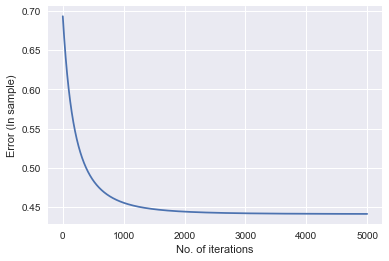

In [86]:
plt.plot(ite,J_val_train)
plt.xlabel("No. of iterations")
plt.ylabel("Error (In sample)")

Text(0,0.5,'Error (In sample)')

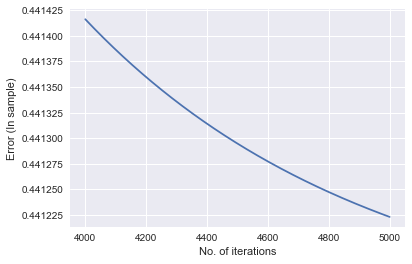

In [87]:
plt.plot(ite[4000:5000],J_val_train[4000:5000])
plt.xlabel("No. of iterations")
plt.ylabel("Error (In sample)")

### Plot learning curve

In [88]:
mset=[i for i in range(1,(xtrain_one.shape[0])+1)]
iterations=5000
alpha=0.01
J_val_train=[]
J_val_val=[]

In [89]:
for m in mset:
    theta=np.zeros(xtrain_one.shape[1]).reshape(-1,1)
    for i in range(0,iterations):
        theta=theta-alpha*(compute_grad(theta,xtrain_one[0:m,:],ytrain[0:m]))
    J_val_train.append(compute_cost(theta,xtrain_one[0:m,:],ytrain[0:m]))
    J_val_val.append(compute_cost(theta,xval_one,yval))

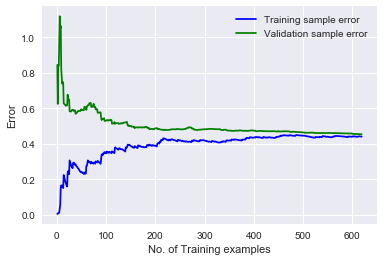

In [90]:
plt.plot(mset,J_val_train,c='b')
plt.plot(mset,J_val_val,c='g')
plt.xlabel("No. of Training examples")
plt.ylabel("Error")
plt.legend(["Training sample error","Validation sample error"])

## Clearly a case of high bias problem...so either we need more features or increase polynomial terms

let us try with different polynomial degrees

In [91]:
degset=[1,2,3,4]
J_val_val_deg=[]
J_val_train_deg=[]
iterations=5000
alpha=0.01

In [92]:
for degri in degset:
    poly=PolynomialFeatures(degree=degri,include_bias=True,interaction_only=False)
    xtrain_poly=poly.fit_transform(xtrain[:,1:])
    xval_poly=poly.fit_transform(xval[:,1:])
    xtrain_two,mu,sig=feature_scale_own(xtrain_poly)
    xval_two=feature_scale_other(xval_poly,mu,sig)
    theta=np.zeros(xtrain_two.shape[1]).reshape(-1,1)
    for i in range(0,iterations):
        theta=theta-alpha*(compute_grad(theta,xtrain_two,ytrain))
    J_val_train_deg.append(compute_cost(theta,xtrain_two,ytrain))
    J_val_val_deg.append(compute_cost(theta,xval_two,yval))

In [93]:
print(xtrain.shape,xtrain_two.shape)

(619, 8) (619, 330)


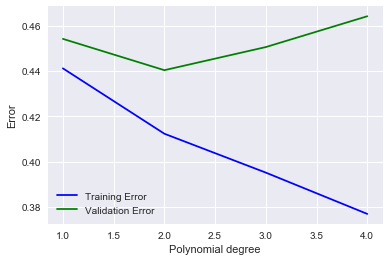

In [94]:
sns.set()
plt.plot(degset,J_val_train_deg,c='b')
plt.plot(degset,J_val_val_deg,c='g')
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend(["Training Error","Validation Error"])


In [95]:
print(degset)
print(J_val_train_deg)
print(J_val_val_deg)

[1, 2, 3, 4]
[0.44122306254241495, 0.41236100476272314, 0.3951862051378174, 0.3769447131329321]
[0.4542473239362654, 0.440423318898455, 0.4506338631762795, 0.4642429647594299]


### I think we can settle with degree=2
Thus new xtrain and xval we be computed in just the next step

In [96]:
poly=PolynomialFeatures(degree=2,include_bias=True,interaction_only=False)
xtrain_poly=poly.fit_transform(xtrain[:,1:])
xval_poly=poly.fit_transform(xval[:,1:])
xtrain_polytwo,mu_two,sig_two=feature_scale_own(xtrain_poly)
xval_polytwo=feature_scale_other(xval_poly,mu_two,sig_two)

Now lets do tests to find best regularization parameter

In [97]:
lambdaset=[]
i=0.1
while i<30:
    lambdaset.append(i)
    i+=0.3
iterations=5000
alpha=0.01
J_val_val=[]
J_val_train=[]
theta_two=np.zeros(xtrain_polytwo.shape[1]).reshape(-1,1)

In [98]:
for lambo in lambdaset:
    theta=np.zeros(xtrain_polytwo.shape[1]).reshape(-1,1)
    for i in range(0,iterations):
        theta=theta-alpha*(compute_grad(theta,xtrain_polytwo,ytrain,lambo))
    theta_two=np.hstack((theta_two,theta))
    J_val_train.append(compute_cost(theta,xtrain_polytwo,ytrain))
    J_val_val.append(compute_cost(theta,xval_polytwo,yval))

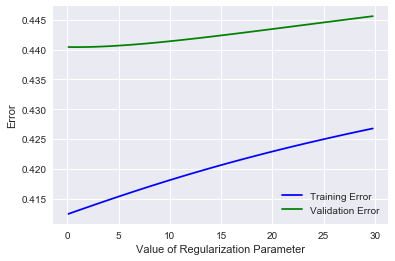

In [99]:
plt.plot(lambdaset,J_val_train,c='b')
plt.plot(lambdaset,J_val_val,c='g')
plt.xlabel("Value of Regularization Parameter")
plt.ylabel("Error")
plt.legend(["Training Error","Validation Error"])

clearly regularization parameter is increasing validation error thus lambda=0

In [100]:
errormintwo=np.array(J_val_val).min()
print(errormintwo)
theta_two_final=theta_two[:,(np.argmin(np.array(J_val_val))+1)]

0.4404107906751306


### Now let us try the same with degree=3

In [101]:
poly=PolynomialFeatures(degree=3,include_bias=True,interaction_only=False)
xtrain_poly=poly.fit_transform(xtrain[:,1:])
xval_poly=poly.fit_transform(xval[:,1:])
xtrain_polythree,mu_three,sig_three=feature_scale_own(xtrain_poly)
xval_polythree=feature_scale_other(xval_poly,mu_three,sig_three)

Now lets do tests to find best regularization parameter

In [102]:
lambdaset=[]
i=0.1
while i<80:
    lambdaset.append(i)
    i+=0.3
iterations=5000
alpha=0.01
J_val_val=[]
J_val_train=[]
theta_three=np.zeros(xtrain_polythree.shape[1]).reshape(-1,1)

In [103]:
for lambo in lambdaset:
    theta=np.zeros(xtrain_polythree.shape[1]).reshape(-1,1)
    for i in range(0,iterations):
        theta=theta-alpha*(compute_grad(theta,xtrain_polythree,ytrain,lambo))
    theta_three=np.hstack((theta_three,theta))
    J_val_train.append(compute_cost(theta,xtrain_polythree,ytrain))
    J_val_val.append(compute_cost(theta,xval_polythree,yval))

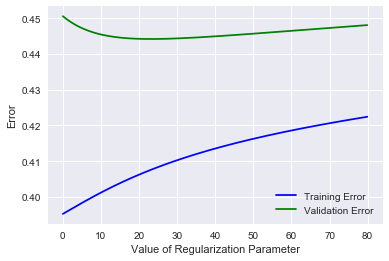

In [104]:
plt.plot(lambdaset,J_val_train,c='b')
plt.plot(lambdaset,J_val_val,c='g')
plt.xlabel("Value of Regularization Parameter")
plt.ylabel("Error")
plt.legend(["Training Error","Validation Error"])

clearly regularization parameter is between 0 and 10

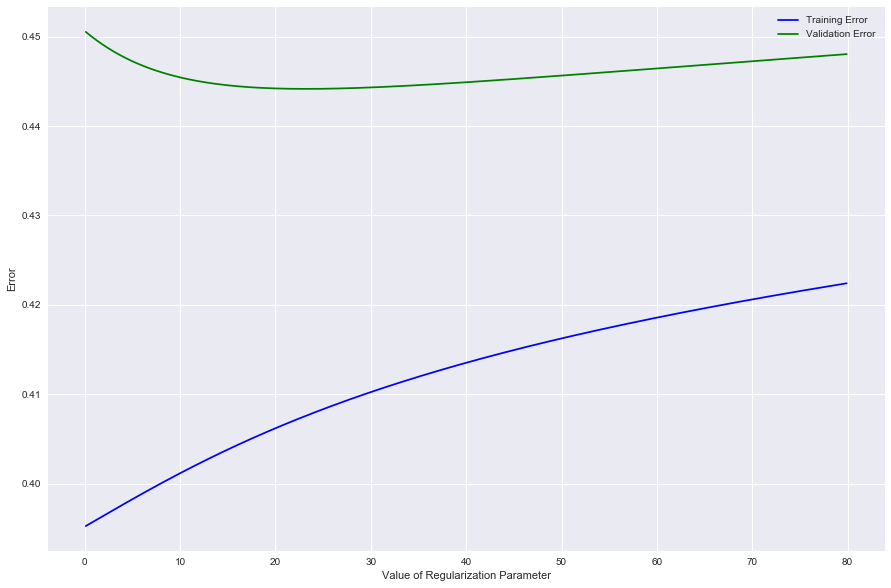

In [105]:
plt.figure(figsize=(15,10))
plt.plot(lambdaset,J_val_train,c='b')
plt.plot(lambdaset,J_val_val,c='g')
plt.xlabel("Value of Regularization Parameter")
plt.ylabel("Error")
plt.legend(["Training Error","Validation Error"])

In [106]:
errorminthree=np.array(J_val_val).min()
reg_opt_three=lambdaset[np.argmin(J_val_val)]
theta_three_final=theta_three[:,(np.argmin(J_val_val)+1)]
print(errorminthree,reg_opt_three)

0.4441636137717145 23.20000000000003


#### So we can use errortwo (error associated with degree 2 model with lambda=0) or we can use errorthree (error associated with degree 2 model with lambda=re_opt_three)
i.e.
if errortwo<=errorthree

    theta_two
    
else

    theta_three

### Choosing final theta

In [107]:
theta_final=-1
mu_final=-1
sig_final=-1
degree_final=-1
if errormintwo<=errorminthree:
    theta_final=theta_two_final
    mu_final=mu_two
    sig_final=sig_two
    degree_final=2
elif errormintwo>errorminthree:
    theta_final=theta_three_final
    mu_final=mu_three
    sig_final=sig_three
    degree_final=3

In [108]:
#preparing xtrain_final , xval_final and xtest_final
poly=PolynomialFeatures(degree=degree_final,include_bias=True,interaction_only=False)

xtrain_final=poly.fit_transform(xtrain[:,1:])
xval_final=poly.fit_transform(xval[:,1:])
xtest_final=poly.fit_transform(xtest[:,1:])

xtrain_final=feature_scale_other(xtrain_final,mu_final,sig_final)
xval_final=feature_scale_other(xval_final,mu_final,sig_final)
xtest_final=feature_scale_other(xtest_final,mu_final,sig_final)

### Now we have to select threshold for classification i.e. whether to cut gz(theta,x) at 0.5 or some other value

In [109]:
epsilonset=np.arange(0.2,0.99,0.01)
accuracy=[]

In [110]:
for ep in epsilonset:
    hey=compute_acc(theta_final,xval_final,yval,ep)
    accuracy.append(hey)

Text(0,0.5,'Prediction accuracy')

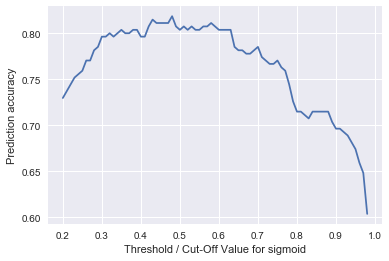

In [111]:
plt.plot(epsilonset,accuracy)
plt.xlabel("Threshold / Cut-Off Value for sigmoid")
plt.ylabel("Prediction accuracy")

In [112]:
epsilon_opt=epsilonset[np.argmax(accuracy)]
accuracy_opt=np.array(accuracy).max()
print(epsilon_opt,accuracy_opt)

0.48000000000000026 0.8185185185185185


## Thus maximum accuracy when we use threshold value as epsilon_opt

In [113]:
#making predictions on Test set
my_result=test_output(theta_final,xtest_final,epsilon_opt)
print(my_result)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]


In [114]:
#solution format demanded in problem
solution_to_submit=np.hstack((np.array(datatest["PassengerId"]).reshape(-1,1),my_result.reshape(-1,1)))

In [115]:
print(solution_to_submit)

[[ 892    0]
 [ 893    0]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    1]
 [ 899    0]
 [ 900    1]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    1]
 [ 908    0]
 [ 909    0]
 [ 910    0]
 [ 911    1]
 [ 912    0]
 [ 913    0]
 [ 914    1]
 [ 915    1]
 [ 916    1]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    0]
 [ 925    0]
 [ 926    1]
 [ 927    0]
 [ 928    1]
 [ 929    1]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    0]
 [ 934    0]
 [ 935    1]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    1]
 [ 941    0]
 [ 942    0]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    0]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    1]
 [ 956    0]
 [ 957    1]
 [ 958    1]
 [ 959    0]
 [ 960    0]
 [ 961    0]
 [ 962    1]
 [ 963    0]
 [ 964    1]
 [ 965    0]
 [ 966    1]
 [ 967    1]
 [ 968    0]

In [116]:
np.savetxt("Submission_one.csv",solution_to_submit, delimiter=",")